## **Day 12 of 30 days Data Analysis** 

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_processed_d11.csv")

# show head of dataset
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross income,Rating,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,522.83,26.1415,9.1,False,True,False,True
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,76.40,3.8200,9.6,False,False,True,False
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,324.31,16.2155,7.4,True,False,False,True
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,465.76,23.2880,8.4,False,True,False,True
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,604.17,30.2085,5.3,False,True,False,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice ID           1000 non-null   object 
 1   Branch               1000 non-null   object 
 2   Customer type        1000 non-null   int64  
 3   Gender               1000 non-null   object 
 4   Product line         1000 non-null   object 
 5   Unit price           1000 non-null   float64
 6   Quantity             1000 non-null   int64  
 7   Tax 5%               1000 non-null   float64
 8   Sales                1000 non-null   float64
 9   Date                 1000 non-null   object 
 10  Time                 1000 non-null   object 
 11  cogs                 1000 non-null   float64
 12  gross income         1000 non-null   float64
 13  Rating               1000 non-null   float64
 14  Payment_Credit card  1000 non-null   bool   
 15  Payment_Ewallet      1000 non-null   bo

In [3]:
df.shape

(1000, 18)

In [4]:
df.isnull().sum()

df.duplicated().sum()

np.int64(0)

In [5]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric  columns: ", numeric_cols)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns
print("Categorical columns: ", categorical_cols)

Numeric  columns:  Index(['Customer type', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross income', 'Rating'],
      dtype='object')
Categorical columns:  Index(['Invoice ID', 'Branch', 'Gender', 'Product line', 'Date', 'Time',
       'Payment_Credit card', 'Payment_Ewallet', 'City_Naypyitaw',
       'City_Yangon'],
      dtype='object')


In [6]:
df[numeric_cols].describe()

,Customer type,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,0.435000,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,0.496005,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,0.000000,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,0.000000,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,1.000000,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,1.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


### ***Analysis of Numeric Columns:***

***- Customer type →*** *Contains only 0 and 1 values, meaning it's an encoded categorical variable. Mean value is 0.435, so about 43.5% of customers are type "1" and the rest are type "0".*

***- Unit price →*** *Average is about 55.67, with a range from 10.08 to 99.96. Standard deviation is 26.49, indicating high price variability and a wide range of product prices.*

***- Quantity →*** *Average quantity is 5.51, with a maximum of 10. Data is skewed toward lower quantities.*

***- Tax 5%, Sales, cogs, gross income →*** *All are strongly related (Tax 5% is exactly 5% of Sales, and cogs/gross income are derived from it). Relatively high dispersion.*

***- Rating →*** *Average rating is 6.97 out of 10, minimum is 4, and maximum is 10. Most ratings are around 7.*

In [7]:
for col in categorical_cols:
    print(f"\nValue counts for {col}: ")
    print(df[col].value_counts())


Value counts for Invoice ID: 
Invoice ID
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
373-73-7910    1
              ..
233-67-5758    1
303-96-2227    1
727-02-1313    1
347-56-2442    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64

Value counts for Branch: 
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

Value counts for Gender: 
Gender
Female    571
Male      429
Name: count, dtype: int64

Value counts for Product line: 
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value counts for Date: 
Date
02-07-19     20
2/15/2019    19
03-02-19     18
01-08-19     18
3/14/2019    18
             ..
02-01-19      6
01-04-19      6
3/21/2019     6
2/21/2019     6
3/17/2019     6
Name: count, Length: 89, dtype: int64

Value counts for Time: 
Time
7:48:00 PM    7
2:

### ***Analysis for Categorical Columns:***

***- Invoice ID →*** *All values are unique, so it serves only as an identifier and isn't useful for statistical analysis.*

***- Branch →*** *Fairly balanced: Alex (340), Cairo (332), Giza (328).*

***- Gender →*** *Should be checked to see if the distribution is approximately equal (you have the complete output to compare).*

***- Product line →*** *Useful for analyzing product diversity and identifying which product line generates the most sales.*

***- Date and Time →*** *Not yet converted to datetime, but will be important for seasonal and hourly analysis.*

***- Payment_Credit card / Payment_Ewallet / City_Naypyitaw / City_Yangon →*** *These are binary variables. Their distribution shows which payment method or city has more representation.*

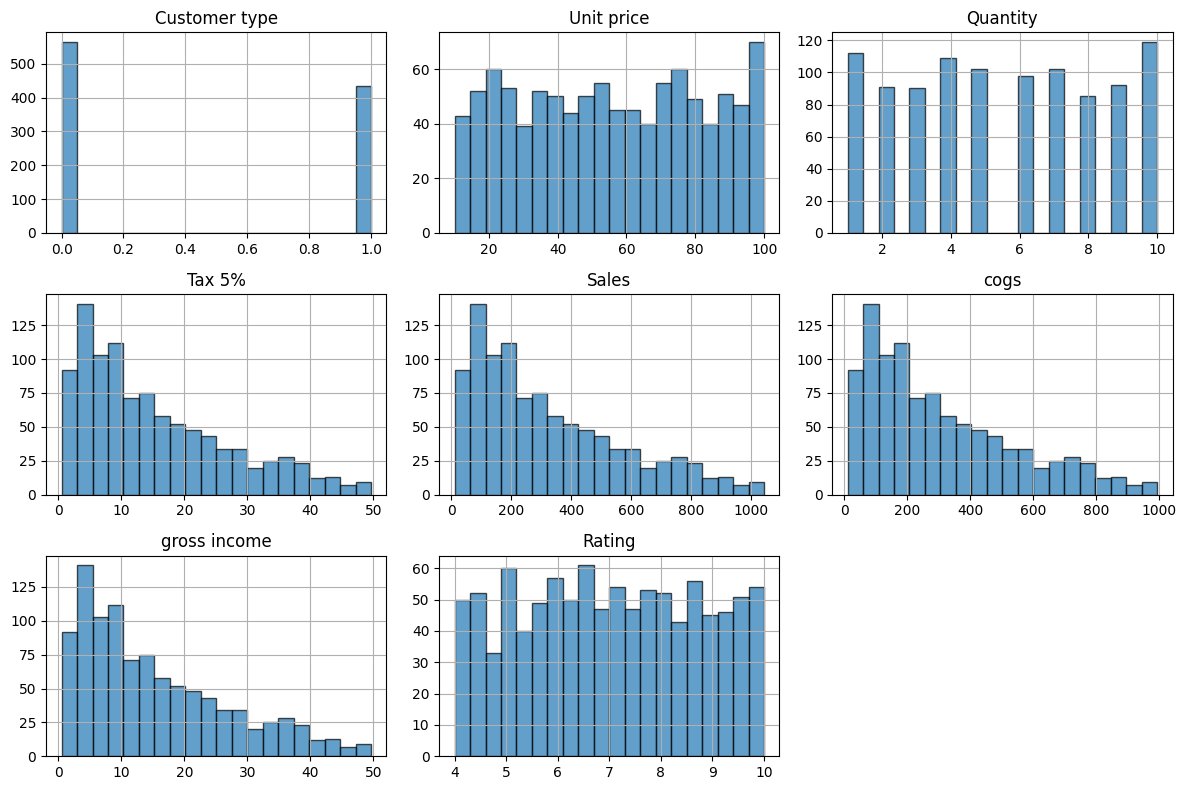

In [8]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(bins=20, edgecolor="black", alpha=0.7 ,figsize=(12,8))
plt.tight_layout()
plt.show()

### ***Histogram Analysis:***

***- Customer type:*** *Data is binary (0 or 1) with slightly more customers in category 0.*

***- Unit price:*** *Fairly uniform distribution, no strong skewness.*

***- Quantity:*** *Discrete values between 1 and 10, relatively evenly distributed.*

***- Tax 5%, Sales, COGS, Gross income:*** *All are right-skewed, meaning most transactions are at the lower end, with fewer high-value transactions.*

***- Rating:*** *Nearly uniform distribution between 4 and 10, indicating varied customer satisfaction scores.*

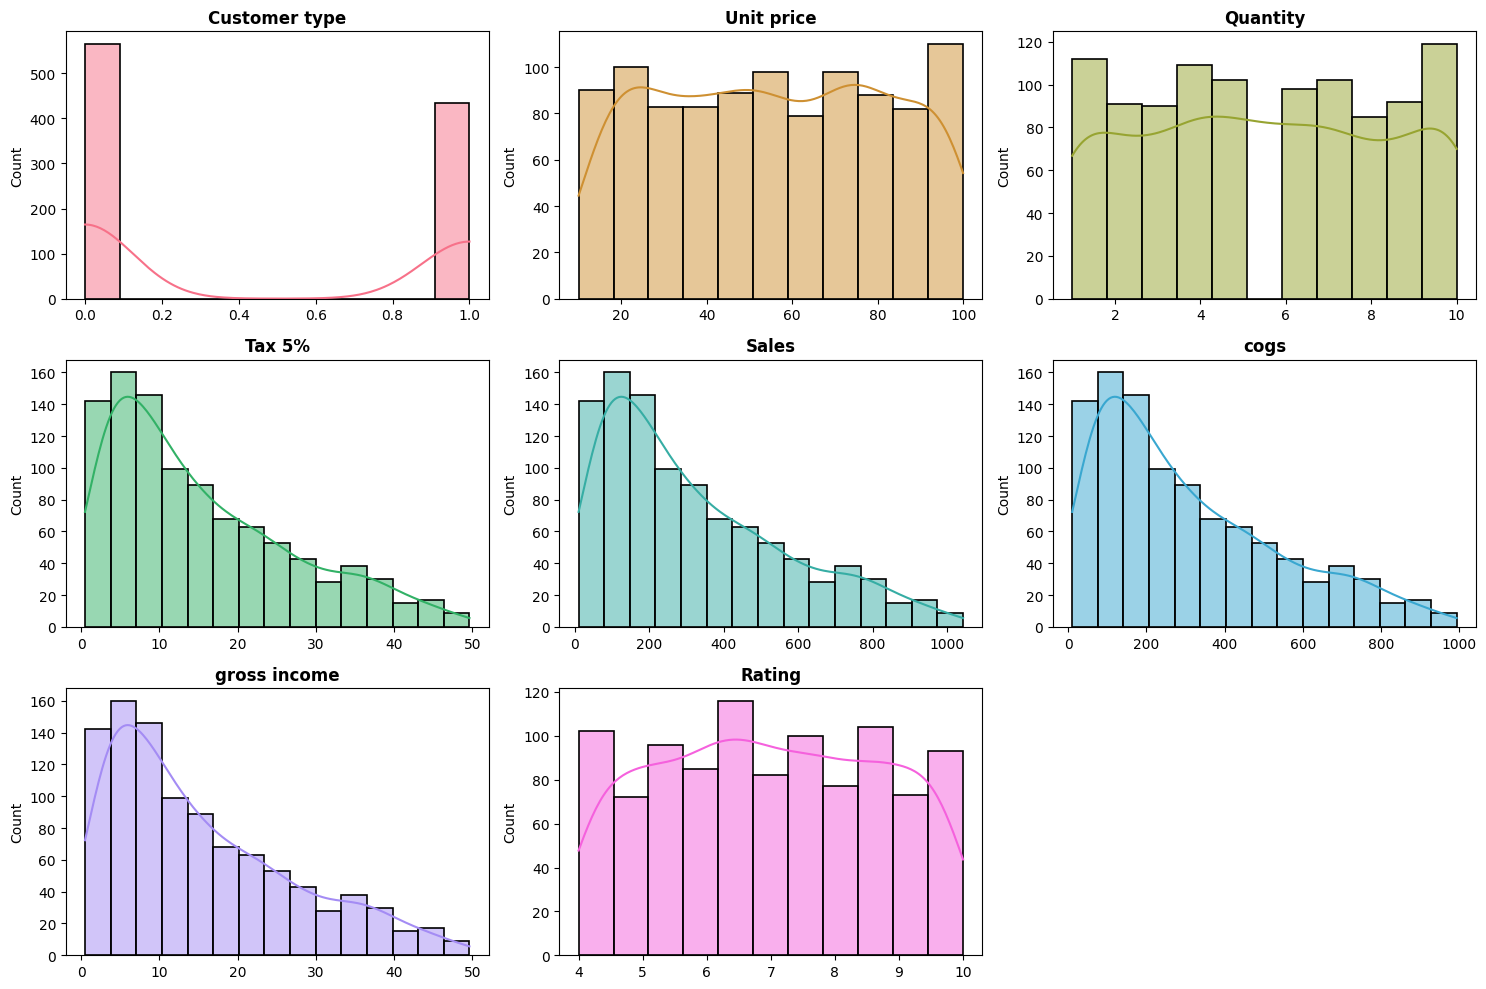

In [9]:
import seaborn as sns

colors = sns.color_palette("husl", len(numeric_cols))

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color=colors[i], edgecolor="black", linewidth=1.2)
    plt.title(col, fontsize=12, fontweight="bold")
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### ***Distribution of Numerical Columns:***

*The histograms below shoa the distribution of each numerical feature in the dataset, with a KDE curve for better visualization. This helps identify patterns, skewness, and potential outliers.*

               Customer type  Unit price  Quantity    Tax 5%     Sales  \
Customer type       1.000000   -0.045817 -0.046839 -0.059247 -0.059247   
Unit price         -0.045817    1.000000  0.010778  0.633962  0.633962   
Quantity           -0.046839    0.010778  1.000000  0.705510  0.705510   
Tax 5%             -0.059247    0.633962  0.705510  1.000000  1.000000   
Sales              -0.059247    0.633962  0.705510  1.000000  1.000000   
cogs               -0.059247    0.633962  0.705510  1.000000  1.000000   
gross income       -0.059247    0.633962  0.705510  1.000000  1.000000   
Rating              0.036844   -0.008778 -0.015815 -0.036442 -0.036442   

                   cogs  gross income    Rating  
Customer type -0.059247     -0.059247  0.036844  
Unit price     0.633962      0.633962 -0.008778  
Quantity       0.705510      0.705510 -0.015815  
Tax 5%         1.000000      1.000000 -0.036442  
Sales          1.000000      1.000000 -0.036442  
cogs           1.000000      1.00

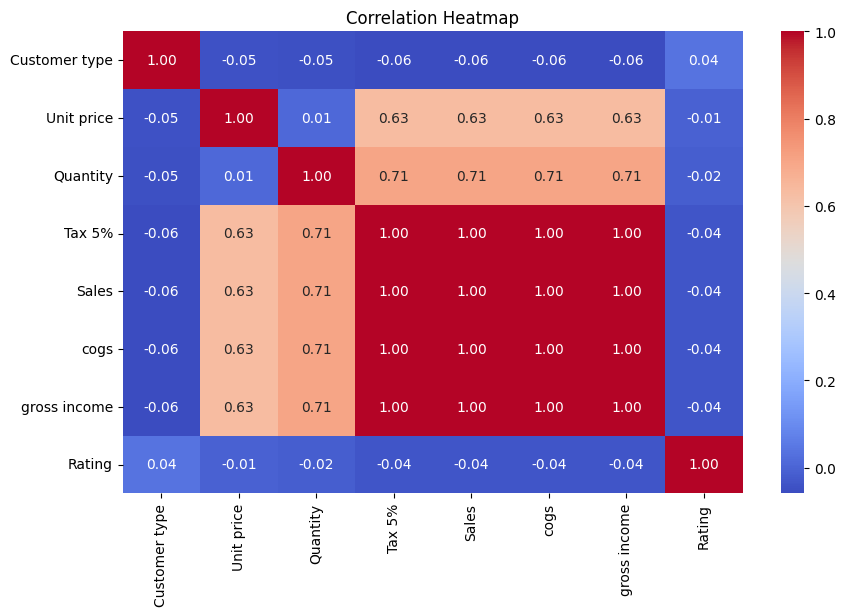


Pairs with strong correlation (>0.7 or <-0.7): 
               Customer type  Unit price  Quantity   Tax 5%    Sales     cogs  \
Customer type            1.0         NaN       NaN      NaN      NaN      NaN   
Unit price               NaN         1.0       NaN      NaN      NaN      NaN   
Quantity                 NaN         NaN   1.00000  0.70551  0.70551  0.70551   
Tax 5%                   NaN         NaN   0.70551  1.00000  1.00000  1.00000   
Sales                    NaN         NaN   0.70551  1.00000  1.00000  1.00000   
cogs                     NaN         NaN   0.70551  1.00000  1.00000  1.00000   
gross income             NaN         NaN   0.70551  1.00000  1.00000  1.00000   
Rating                   NaN         NaN       NaN      NaN      NaN      NaN   

               gross income  Rating  
Customer type           NaN     NaN  
Unit price              NaN     NaN  
Quantity            0.70551     NaN  
Tax 5%              1.00000     NaN  
Sales               1.00000    

In [10]:
# Step 01:
corr_matrix = df[numeric_cols].corr()

# Step 02:
print(corr_matrix)

# Step 03:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 04:
high_corr_pairs = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print("\nPairs with strong correlation (>0.7 or <-0.7): ")
print(high_corr_pairs)

### ***Correlation Summary:***

*- Very strong positive correlation (~1.0): Tax 5%, Sales, cogs, gross income → move together almost perfectly.*

*- Strong positive correlation (~0.71): Quantity with the above metrics → more items sold increases revenue.*

*- Moderate correlation (~0.63): Unit price with revenue-related metrics.*

*- No strong negative correlations detected.*

### ***Day 12 — Multivariate Relationships (Supermarket Sales):***

### ***What I did:***

*- Plotted histograms and boxplots for all numeric features.*

*- Computed a correlation matrix and visualized it with a heatmap.*

*- Compared **Sales** across key categories (Gender, Customer type).

### ***Key Findings:***

*- **Very strong positive correlations (~1.00):** `Tax 5%`, `Sales`, `cogs`, and `gross income` move almost perfectly together (as expected from how they’re calculated).*

*- **Strong positive correlation (~0.71):** `Quantity` with revenue metrics (more items → higher sales/tax/cogs/income).*

*- **Moderate positive correlation (~0.63):** `Unit price` with revenue metrics (higher prices → higher totals).*

*- **No meaningful correlations** between `Rating`/`Customer type` and other numeric variables.*

### ***Why it matters:***

*- Revenue is primarily driven by **Quantity** and **Unit price**.*

*- `Rating` does not appear to drive revenue directly in this dataset.*

*- For segmentation, comparing Sales by **Gender** and **Customer type** helps surface potential target groups.*

### ***Next Steps:***

*- Add simple statistical tests (e.g., t-test) to check if group differences in Sales are significant.*

*- Build one small KPI table (mean/median/count) for Sales by Gender and Customer type.*

*- Capture insights as short bullet points for the final report.*

Sales KPIs by Gender:
           mean  median count
         Sales   Sales Sales
Gender                      
Female  340.93  284.19   571
Male    299.06  214.75   429 

Sales KPIs by Customer Type:
                     mean  median count
                   Sales   Sales Sales
CustomerType_lbl                      
Member            335.74  271.95   565
Normal            306.37  225.79   435 



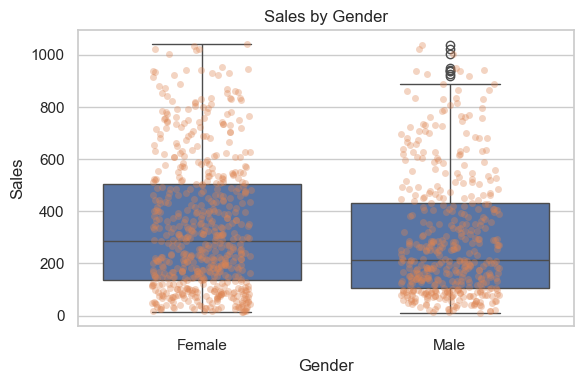

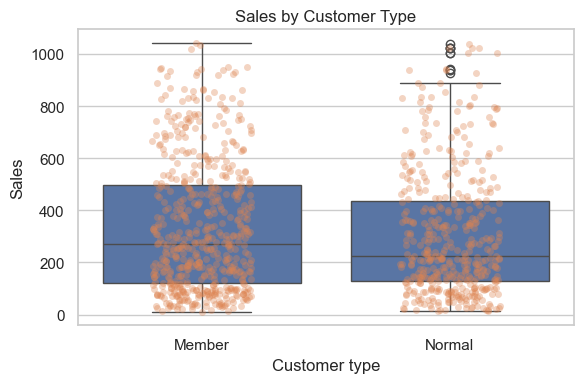

In [11]:
sns.set(style="whitegrid")

cust_map = {0:"Member", 1:"Normal"}
df["CustomerType_lbl"] = df["Customer type"].map(cust_map).fillna(df["Customer type"])

kpi_gender = df.pivot_table(values="Sales", index="Gender",
                            aggfunc=["mean", "median", "count"]).round(2)
kpi_cust = df.pivot_table(values="Sales", index="CustomerType_lbl",
                          aggfunc=["mean", "median", "count"]).round(2)

print("Sales KPIs by Gender:\n", kpi_gender, "\n")
print("Sales KPIs by Customer Type:\n", kpi_cust, "\n")

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Gender", y="Sales")
sns.stripplot(data=df, x="Gender", y="Sales", alpha=0.35, jitter=0.2)
plt.title("Sales by Gender")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="CustomerType_lbl", y="Sales")
sns.stripplot(data=df, x="CustomerType_lbl", y="Sales", alpha=0.35, jitter=0.2)
plt.title("Sales by Customer Type")
plt.xlabel("Customer type")
plt.tight_layout()
plt.show()

### ***Conclusion (Day 12):*** 
*Quantity and unit price jointly explain most of the movement in revenue metrics. Group-wise comparisons (Gender, Customer type) show distributional differences worth testing statistically, but no immediate red flags. Next: add significance tests and start drafting the final EDA summary.*

### ***Export Cleaned Data:***

*- Finaly, exported the cleaned dataset for further analysis:*

In [12]:
df.to_csv("supermarket_processed_d12.csv", index = False)